# **Library installation and Import packages**

In [ ]:
# !pip uninstall snntoolbox  #

!pip install snntoolbox

In [3]:
"""End-to-end example for SNN Toolbox.

This script sets up a small CNN using Keras and tensorflow, trains it for ten
epoch on MNIST, stores model and dataset in a temporary folder on disk, creates
a configuration file for SNN toolbox, and finally calls the main function of
SNN toolbox to convert the trained ANN to an SNN and run it using INI
simulator.

"""

import os
import time
import numpy as np
import torch

from tensorflow import keras
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, \
    Dropout, Concatenate, BatchNormalization, Activation
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

from snntoolbox.bin.run import main
from snntoolbox.utils.utils import import_configparser



In [4]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


# **Prepare MNIST dataset to use**

In [5]:

# Define path where model and output files will be stored.
path_wd = '/content/drive/MyDrive/Dissertation/project_code/SNNToolbox/models/'

# GET DATASET #
###############

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize input so we can train ANN with it.
# Will be converted back to integers for SNN layer.
x_train = x_train / 255
x_test = x_test / 255

# Add a channel dimension.
axis = 1 if keras.backend.image_data_format() == 'channels_first' else -1
x_train = np.expand_dims(x_train, axis)
x_test = np.expand_dims(x_test, axis)

# One-hot encode target vectors.
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Save dataset so SNN toolbox can find it.
np.savez_compressed(os.path.join(path_wd, 'x_test'), x_test)
np.savez_compressed(os.path.join(path_wd, 'y_test'), y_test)
# SNN toolbox will not do any training, but we save a subset of the training
# set so the toolbox can use it when normalizing the network parameters.
np.savez_compressed(os.path.join(path_wd, 'x_norm'), x_train[::10])



11490434/11490434 [==============================] - 1s 0us/step


In [6]:
x_train.shape[1:]

(28, 28, 1)

# **Build and Train Sequential Keras Model with the same definition as the model used for training pytorch model**

In [7]:
# # Uninstall the current version of TensorFlow.
# !pip uninstall tensorflow

# # # Install TensorFlow 1.15.0.
# !pip install tensorflow

# # Verify the TensorFlow version.
# import tensorflow as tf
# print(tf.__version__)

In [8]:
# CREATE ANN #
##############

# This section creates a CNN using Keras, and trains it with backpropagation.
# There are no spikes involved at this point. The model is far more complicated
# than necessary for MNIST, but serves the purpose to illustrate the kind of
# layers and topologies supported (in particular branches).

# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, ReLU, AvgPool2D, Flatten, Dense

# Instantiate the Sequential model
# ann_keras = Sequential()

# # Add layers to the Sequential model
# ann_keras.add(Conv2D(20, kernel_size=(5, 5), strides=(1, 1), use_bias=False, input_shape=x_train.shape[1:]))
# ann_keras.add(ReLU())
# ann_keras.add(AvgPool2D(pool_size=(2, 2), strides=(2, 2)))

# ann_keras.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), use_bias=False))
# ann_keras.add(ReLU())
# ann_keras.add(AvgPool2D(pool_size=(2, 2), strides=(2, 2)))

# ann_keras.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), use_bias=False))
# ann_keras.add(ReLU())
# ann_keras.add(AvgPool2D(pool_size=(2, 2), strides=(2, 2)))

# ann_keras.add(Flatten())
# ann_keras.add(Dense(500, use_bias=False))
# ann_keras.add(ReLU())
# ann_keras.add(Dense(10, use_bias=False))

# # Display the model summary
# ann_keras.summary()



input_shape = x_train.shape[1:]
# input_layer = Input(input_shape)

# layer = Conv2D(filters=16,
#                kernel_size=(5, 5),
#                strides=(2, 2),
#                activation='relu')(input_layer)
# layer = BatchNormalization(axis=axis)(layer)
# layer = Activation('relu')(layer)
# layer = AveragePooling2D()(layer)
# branch1 = Conv2D(filters=32,
#                  kernel_size=(3, 3),
#                  padding='same',
#                  activation='relu')(layer)
# branch2 = Conv2D(filters=8,
#                  kernel_size=(1, 1),
#                  activation='relu')(layer)
# layer = Concatenate(axis=axis)([branch1, branch2])
# layer = Conv2D(filters=10,
#                kernel_size=(3, 3),
#                activation='relu')(layer)
# layer = Flatten()(layer)
# layer = Dropout(0.01)(layer)
# layer = Dense(units=10,
#               activation='softmax')(layer)

# model = Model(input_layer, layer)

# model.summary()

import tensorflow as tf

# from keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, AveragePooling2D, Concatenate, Flatten, Dropout, Dense

from tensorflow import keras
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, \
    Dropout, Concatenate, BatchNormalization, Activation
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# from keras.layers import Input, Conv2D, BatchNormalization, Activation, AveragePooling2D, Flatten, Dense
# from keras.models import Model

# Importing necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# model = keras.models.Sequential([
#   keras.layers.Flatten(input_shape=(28, 28)),
#   keras.layers.Dense(128, activation='relu'),
#   keras.layers.Dense(10)
# ])
# model.compile(
#     optimizer=keras.optimizers.Adam(0.001),
#     loss=keras.losses.CategoricalCrossentropy(from_logits=True),
#     metrics=[keras.metrics.CategoricalAccuracy()],
# )


# model.fit(x_train, y_train, batch_size=64, epochs=1, verbose=2,
#            validation_data=(x_test, y_test))


model = Sequential([
    Conv2D(filters=16, kernel_size=(5, 5), strides=(2, 2), input_shape=(28,28,1)),
    # BatchNormalization(),
    Activation('relu'),
    AveragePooling2D(),
    # Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'),
    # Conv2D(filters=8, kernel_size=(1, 1), activation='relu'),

    Conv2D(filters=10, kernel_size=(3, 3)),
    Activation('relu'),
    Flatten(),
    # Dropout(0.01),
    Dense(units=10, activation='softmax')
])



model.compile('adam', 'categorical_crossentropy', ['accuracy'])

# Train model with backprop.
model.fit(x_train, y_train, batch_size=64, epochs=10, verbose=2,
          validation_data=(x_test, y_test))

model.summary()

Epoch 1/10
938/938 - 8s - loss: 0.4408 - accuracy: 0.8697 - val_loss: 0.1784 - val_accuracy: 0.9463 - 8s/epoch - 9ms/step
Epoch 2/10
938/938 - 9s - loss: 0.1626 - accuracy: 0.9517 - val_loss: 0.1201 - val_accuracy: 0.9622 - 9s/epoch - 10ms/step
Epoch 3/10
938/938 - 7s - loss: 0.1236 - accuracy: 0.9631 - val_loss: 0.1001 - val_accuracy: 0.9680 - 7s/epoch - 7ms/step
Epoch 4/10
938/938 - 9s - loss: 0.1037 - accuracy: 0.9694 - val_loss: 0.0824 - val_accuracy: 0.9740 - 9s/epoch - 9ms/step
Epoch 5/10
938/938 - 6s - loss: 0.0912 - accuracy: 0.9725 - val_loss: 0.0753 - val_accuracy: 0.9764 - 6s/epoch - 7ms/step
Epoch 6/10
938/938 - 9s - loss: 0.0832 - accuracy: 0.9747 - val_loss: 0.0731 - val_accuracy: 0.9757 - 9s/epoch - 10ms/step
Epoch 7/10
938/938 - 7s - loss: 0.0753 - accuracy: 0.9771 - val_loss: 0.0680 - val_accuracy: 0.9779 - 7s/epoch - 7ms/step
Epoch 8/10
938/938 - 9s - loss: 0.0703 - accuracy: 0.9785 - val_loss: 0.0583 - val_accuracy: 0.9823 - 9s/epoch - 9ms/step
Epoch 9/10
938/938 - 6

# **SNN Toolbox Framework**

In [9]:
import torch
import tensorflow as tf

# Store model so SNN Toolbox can find it.
model_name = 'mnist_cnn'
keras.models.save_model(model, os.path.join(path_wd, model_name + '.h5'))
#model.save(os.path.join(path_wd, model_name + '.h5'))

#torch.save(model.state_dict(), os.path.join(path_wd, model_name + '.pth'))

#torch.save(model.state_dict, os.path.join(path_wd, model_name + '.pth'))

<ipython-input-9-fe630b565a54>:6: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  keras.models.save_model(model, os.path.join(path_wd, model_name + '.h5'))


In [10]:
# SNN TOOLBOX CONFIGURATION #
#############################

# Create a config file with experimental setup for SNN Toolbox.
configparser = import_configparser()
config = configparser.ConfigParser()

config['paths'] = {
    'path_wd': path_wd,             # Path to model.
    'dataset_path': path_wd,        # Path to dataset.
    'filename_ann': model_name      # Name of input model.
}

config['tools'] = {
    'evaluate_ann': True,           # Test ANN on dataset before conversion.
    'normalize': True               # Normalize weights for full dynamic range.
}

config['simulation'] = {
    'simulator': 'INI',             # Chooses execution backend of SNN toolbox.
    'duration': 100,                 # Number of time steps to run each sample.
    'num_to_test': 100,             # How many test samples to run.
    'batch_size': 100,               # Batch size for simulation.
    'keras_backend': 'tensorflow'   # Which keras backend to use.
}

config['output'] = {
    # 'plot_vars': {                  # Various plots (slows down simulation). Leave section empty to turn off plots.
    #     'spikerates'
    #     },
    # 'log_vars': {
    #     'spiketrains_n_b_l_t',
    #     'activations_n_b_l'
    #     }
    'log_vars' : {'activations_n_b_l', 'spiketrains_n_b_l_t', 'input_b_l_t',
            'mem_n_b_l_t', 'synaptic_operations_b_t', 'neuron_operations_b_t',
            'all'},
    'plot_vars' : {'activations', 'spiketrains', 'spikecounts', 'spikerates',
             'input_image', 'error_t',  'correlation',
             'hist_spikerates_activations', 'normalization_activations',
             'operations', 'v_mem'}
}

In [11]:
# Store config file.
config_filepath = os.path.join(path_wd, 'config')
with open(config_filepath, 'w') as configfile:
    config.write(configfile)

Initializing INI simulator...

Loading scale factors from disk instead of recalculating.
Loading data set from '.npz' files in /content/drive/MyDrive/Dissertation/project_code/SNNToolbox/models.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 12, 12, 16)        416       
                                                                 
 activation (Activation)     (None, 12, 12, 16)        0         
                                                                 
 average_pooling2d (Average  (None, 6, 6, 16)          0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 10)          1450      
                                                                 
 activation_1 (Activation)   (None, 4, 4, 10)          0  

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Building spiking model...
Building layer: 0Conv2D_12x12x16
Building layer: 1AveragePooling2D_6x6x16
Building layer: 2Conv2D_4x4x10
Building layer: 3Flatten_160
Building layer: 4Dense_10
Compiling spiking model...

Detected layer with biases: 0Conv2D_12x12x16
Detected layer with biases: 2Conv2D_4x4x10
Detected layer with biases: 4Dense_10
Number of operations of ANN: 166954
Number of neurons: 3050
Number of synapses: 121280

Saving model to /content/drive/MyDrive/Dissertation/project_code/SNNToolbox/models/mnist_cnn_INI.h5...


Starting new simulation...

Current accuracy of batch:
8.00%_13.00%_27.00%_47.00%_66.00%_83.00%_94.00%_98.00%_100.00%_100.00%_100.00%_100.00%_100.00%_100.00%_100.00%_100.00%_100.00%_100.00%_100.00%_100.00%_100.00%_100.00%_100.00%_100.00%_100.00%_100.00%_100.00%_100.00%_100.00%_100.00%_100.00%_100.00%_100.00%_100.00%_100.00%_100.00%_100.00%_100.00%_100.00%_100.00%_100.00%_100.00%_100.00%_100.00%_100.00%_100.00%_100.00%_100.00%_100.00%_100.00%_100.00%_100.00%_100.0

Calculating activations...

Average spike rate: 0.08309165362545644 spikes per simulation time step.


/usr/local/lib/python3.10/dist-packages/numpy/lib/npyio.py:716: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  val = np.asanyarray(val)


Saving plots of one sample to /content/drive/MyDrive/Dissertation/project_code/SNNToolbox/models/log/gui/test...

Plotting layer 0Conv2D_12x12x16
Plotting layer 1AveragePooling2D_6x6x16
Plotting layer 2Conv2D_4x4x10
Plotting layer 4Dense_10
Plotting batch run statistics...
Done.

Simulation finished.


Total accuracy: 100.00% on 100 test samples.


Accuracy averaged by class size: 100.00%


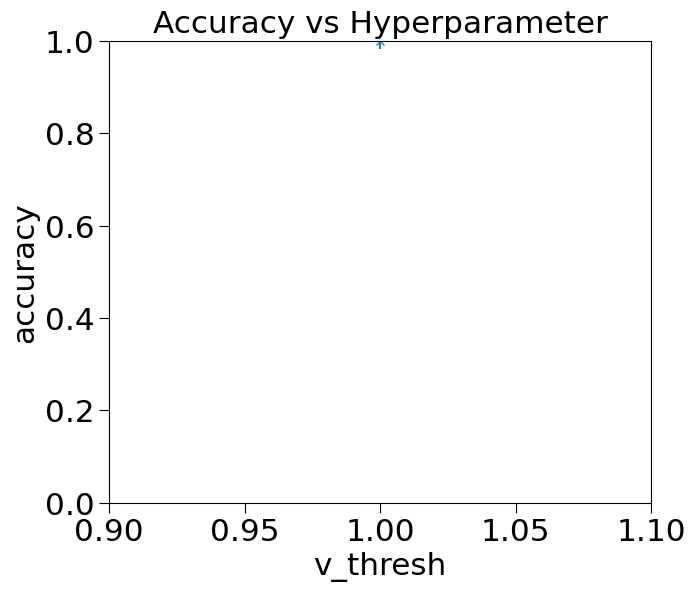

In [12]:
# RUN SNN TOOLBOX #
###################

main(config_filepath)

#10 - 99.00% 0.0662073552425665 32s
#100 - 99.00% 0.08507443922796036 45s
#200 - 99.00% 0.08648813249869589 60s
#300 - 99.00% 0.08689237523908885/T 78s

#Statistical Hypothesis Testing

In [13]:
# load dataset
# import numpy as np

# from sklearn.datasets import fetch_openml
# X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False, parser="pandas")

# y = np.expand_dims(y, 1)
# y.shape

# data = np.concatenate((X, y), axis=1)

In [14]:
# X.shape

(70000, 784)

In [15]:
# y_train[:10000].shape

In [16]:
# import numpy
# from sklearn.utils import resample
# from sklearn.metrics import accuracy_score
# from matplotlib import pyplot

# # load dataset
# # (X_train, y_train), (X_test, y_test) = mnist.load_data()
# databt = data[:100]


# # configure bootstrap
# n_iterations = 10
# # datalenght = 70000
# n_size = int(len(databt) * 0.50)
# # load_model(os.path.join(path_wd, 'mnist_cnn.h5')
# # run bootstrap
# stats = list()
# for i in range(n_iterations):
#  # prepare train and test sets
#  train = resample(databt, n_samples=n_size)
#  train_x = train[:,:-1].reshape(train[:,:-1].shape[0],28,28,1) / 255.0
#  train_y = to_categorical(train[:,-1], 10)
#  train = train.tolist()
#  databt = databt.tolist()

#  test = set(databt) - set(train)
# #  test = [i for i in databt if i not in train]
#  test_x = numpy.array(test[:-1])
# #  test_x = test_x.reshape(28,28,1) / 255.0
# #  test_x = test_x[:, 1:].reshape((28, 28, 1))
#  test_x = test_x[:,:-1].reshape(test_x[:,:-1].shape[0],28,28,1)
# #  test_y = numpy.array(test[-1:])
# #  test_y = test_y[:,-1].reshape(test_y[:,-1].shape[0],1)
#  test_y = to_categorical(test_y[:,-1], 10)
# #  test_y = y_values[20000:] #numpy.array([j for j in y_values if j not in train_y])
#  # fit model
#  model = tf.keras.models.load_model(os.path.join(path_wd, 'mnist_cnn.h5'))
#  model.fit(tf.convert_to_tensor(train_x, dtype=tf.int64), tf.convert_to_tensor(train_y, dtype=tf.int64))
#  # evaluate model
#  predictions = model.predict(tf.convert_to_tensor(test_x, dtype=tf.int64))
# #  predictions=np.argmax(predictions, axis=1)
# #  test_y=np.argmax(test_y, axis=1)
#  score = accuracy_score(test_y, predictions)
#  print(score)
#  stats.append(score)
# # plot scores
# pyplot.hist(stats)
# pyplot.show()
# # confidence intervals
# alpha = 0.95
# p = ((1.0-alpha)/2.0) * 100
# lower = max(0.0, numpy.percentile(stats, p))
# p = (alpha+((1.0-alpha)/2.0)) * 100
# upper = min(1.0, numpy.percentile(stats, p))
# print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

TypeError: unhashable type: 'list'

In [ ]:
len(test)

In [ ]:
# import numpy
# from sklearn.utils import resample
# from sklearn.metrics import accuracy_score
# from matplotlib import pyplot

# # load dataset
# # train_data = np.concatenate([x_train, y_train], axis=0)
# # test_data = np.concatenate([x_test, y_test], axis=0)
# x_values = x_train[:20000]
# y_values = y_train[:20000]

# # configure bootstrap
# n_iterations = 1000
# # datalenght = 70000
# n_size = 10000 #int(len(x_values) * 0.50)
# # load_model(os.path.join(path_wd, 'mnist_cnn.h5')
# # run bootstrap
# stats = list()
# for i in range(n_iterations):
#  # prepare train and test sets
#  train_x = x_values[:10000]#resample(x_values, n_samples=n_size)
#  train_y = y_values[:10000]#resample(y_values, n_samples=n_size)
#  test_x = x_values[10000:]#numpy.array([i for i in x_values if i not in train_x])
#  test_y = y_values[10000:]#numpy.array([j for j in y_values if j not in train_y])
#  # fit model
#  model = tf.keras.models.load_model(os.path.join(path_wd, 'mnist_cnn.h5'))
#  model.fit(train_x, train_y, batch_size=64)
#  # evaluate model
#  predictions = model.predict(test_x)
#  predictions=np.argmax(predictions, axis=1)
#  test_y=np.argmax(test_y, axis=1)
#  score = accuracy_score(test_y, predictions)
#  print(score)
#  stats.append(score)
# # plot scores
# pyplot.hist(stats)
# pyplot.show()
# # confidence intervals
# alpha = 0.95
# p = ((1.0-alpha)/2.0) * 100
# lower = max(0.0, numpy.percentile(stats, p))
# p = (alpha+((1.0-alpha)/2.0)) * 100
# upper = min(1.0, numpy.percentile(stats, p))
# print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

# **Nengo Framework**


In [ ]:
#!pip uninstall nengo-dl ==
# !pip install keras_spiking

In [ ]:
# %matplotlib inline

# from urllib.request import urlretrieve

# import matplotlib.pyplot as plt
# import nengo
# import numpy as np
# import tensorflow as tf

# import keras_spiking

# seed = 0
# np.random.seed(seed)
# tf.random.set_seed(seed)

In [ ]:
# print(tf.__version__)

In [ ]:
# converter = nengo_dl.Converter(model)